In [66]:
import uproot, ROOT, glob, os, random, time
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.metrics import roc_curve, roc_auc_score, auc
from tqdm import tqdm
import pandas as pd
from xgboost import XGBClassifier
import seaborn as sns

path = '/eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/'
signal_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.346193.PoPy8_NNPDF30_VBFH125_tth30h20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345120.PoPy8_NNLO_30_ggH125_ttl13l7.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345121.PoPy8_NNLO_30_ggH125_ttlm15hp20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345122.PoPy8_NNLO_30_ggH125_ttlp15hm20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.345123.PoPy8_NNLO_30_ggH125_tth30h20.PHYS.e5814_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']

bkg_path = [path+'user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700491.Sh_2211_WqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700492.Sh_2211_WqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700493.Sh_2211_ZqqZll.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700495.Sh_2211_ZqqZvv.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700600.Sh_2212_llll.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700601.Sh_2212_lllv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700602.Sh_2212_llvv_os.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700603.Sh_2212_llvv_ss.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700604.Sh_2212_lvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700605.Sh_2212_vvvv.PHYS.e8433_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700792.Sh_2214_Ztt_maxHTpT_BF.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700793.Sh_2214_Ztt_maxHTpT_CFBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root',
path+'user.shhirose.Httbst_b4.mc20_13TeV.700794.Sh_2214_Ztt_maxHTpT_CVBV.PHYS.e8527_s3681_r13145_p5855.smPre_w_0_HS/user.*.root']

In [14]:
signal_xs_num = [346190, 346191, 346192, 346193, 345120, 345121, 345122, 345123]
bkg_xs_num = [700488, 700489, 700491, 700492, 700493, 700495, 700600, 700601, 700602, 700603, 700604, 700605, 700792, 700793, 700794]

In [29]:
def getXS(dsid):
    xs_file = "/cvmfs/atlas.cern.ch/repo/sw/database/GroupData/dev/PMGTools/PMGxsecDB_mc16.txt"
    try:
        with open(xs_file, "r") as f:
            for line in f:
                columns = line.split()
                if columns[0] == str(dsid):
                    return float(columns[2])*float(columns[3])*float(columns[4])
        print( "Couldn't find cross section for dsid", dsid, "so setting to 1.")
    except IOError:
        print("Cross section file not accessible on cvmfs.", dsid, " XS setting to 1.")
    return 1

signal_xs = [getXS(i) for i in signal_xs_num]
bkg_xs = [getXS(i) for i in bkg_xs_num]

In [30]:
List = glob.glob(os.path.join(signal_path[0]))
f = uproot.open(List[0])
f.keys()

['NOMINAL;1',
 'cutflow_muon_NOMINAL;1',
 'cutflow_ele_NOMINAL;1',
 'cutflow_pho_NOMINAL;1',
 'cutflow_tau_NOMINAL;1',
 'cutflow_mc_hs_jet_NOMINAL;1',
 'cutflow_mc_pileup_jet_NOMINAL;1',
 'cutflow_HSM_common;1',
 'h_metadata;1',
 'h_metadata_theory_weights;1']

In [31]:
f['NOMINAL'].keys()

['HLT_j420',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1J100',
 'HLT_j420_a10t_lcw_jes_35smcINF_L1SC111',
 'HTXS_Higgs_eta',
 'HTXS_Higgs_pt',
 'HTXS_Njets_pTjet25',
 'HTXS_Njets_pTjet30',
 'HTXS_Stage0_Category',
 'HTXS_Stage1_2_Category_pTjet25GeV',
 'HTXS_Stage1_2_Category_pTjet30GeV',
 'HTXS_Stage1_2_Fine_Category_pTjet25GeV',
 'HTXS_Stage1_2_Fine_Category_pTjet30GeV',
 'HTXS_Stage1_Category_pTjet25GeV',
 'HTXS_Stage1_Category_pTjet30GeV',
 'HTXS_errorMode',
 'HTXS_prodMode',
 'NOMINAL_pileup_combined_weight',
 'NOMINAL_pileup_random_lb_number',
 'NOMINAL_pileup_random_run_number',
 'PRW_DATASF_1down_pileup_combined_weight',
 'PRW_DATASF_1up_pileup_combined_weight',
 'beamSpotWeight',
 'boson_0',
 'boson_0_classifierParticleOrigin',
 'boson_0_classifierParticleType',
 'boson_0_mother_pdgId',
 'boson_0_mother_status',
 'boson_0_origin',
 'boson_0_p4',
 'boson_0_pdgId',
 'boson_0_pz',
 'boson_0_q',
 'boson_0_status',
 'boson_0_type',
 'channel_index',
 'ditau_obj_IsTruthHadronic',
 'ditau_ob

In [33]:
branches = \
['ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
 'ditau_obj_R_jet',
 'ditau_obj_R_subjet',
 'ditau_obj_Rr_core',
 'ditau_obj_bdt_score',
 'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
 'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
 'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
 'ditau_obj_p4',
 'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
 'ditau_obj_subleadsubjet_p4',
 'ditau_obj_tauJetVtxFraction',
#  'ditau_obj_truth_leadTau_p4',
#  'ditau_obj_truth_p4',
#  'ditau_obj_truth_subleadTau_p4',
 'event_number',
 'weight_mc']

In [68]:
def read_root(file_paths):
    out = []
    l1 = glob.glob(os.path.join(file_paths))
    for i in range(len(l1)):
        s = time.time()
        f_1 = uproot.open(l1[i]+':NOMINAL')
        events = f_1.arrays(branches, library='ak')
        print("processed: ", l1[i], "time spent", round(time.time()-s, 4), 's')
        out = ak.concatenate((events, out))
    return out

t_346190, t_346191, t_346192, t_346193, t_345120, t_345121, t_345122, t_345123 = read_root(signal_path[0]), read_root(signal_path[1]), read_root(signal_path[2]), read_root(signal_path[3]), \
read_root(signal_path[4]), read_root(signal_path[5]), read_root(signal_path[6]), read_root(signal_path[7])

processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346190.PoPy8_NNPDF30_VBFH125_ttl13l7.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940915._000001.HSM_common.root time spent 0.4392 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346191.PoPy8_NNPDF30_VBFH125_ttlm15hp20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940916._000001.HSM_common.root time spent 0.2128 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.346192.PoPy8_NNPDF30_VBFH125_ttlp15hm20.PHYS.e7259_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.36940917._000001.HSM_common.root time spent 0.2076 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Ht

In [69]:
t_700488, t_700489, t_700491, t_700492, t_700493, t_700495, t_700600, t_700601, t_700602, t_700603, t_700604, t_700605, t_700792, t_700793, t_700794 = \
read_root(bkg_path[0]), read_root(bkg_path[1]), read_root(bkg_path[2]), read_root(bkg_path[3]), read_root(bkg_path[4]), read_root(bkg_path[5]), read_root(bkg_path[6]), read_root(bkg_path[7]), \
read_root(bkg_path[8]), read_root(bkg_path[9]), read_root(bkg_path[10]), read_root(bkg_path[11]), read_root(bkg_path[12]), read_root(bkg_path[13]), read_root(bkg_path[14])

processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.37035342._000001.HSM_common.root time spent 8.2043 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.700488.Sh_2211_WlvWqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.37035342._000002.HSM_common.root time spent 8.7008 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338_s3681_r13145_p5855.smPre_w_0_HS/user.shhirose.37035343._000001.HSM_common.root time spent 1.4365 s
processed:  /eos/atlas/unpledged/group-tokyo/users/shhirose/HttRun3/boost_ntuples/V04/mc/ditau_hh/mc20e/nom/user.shhirose.Httbst_b4.mc20_13TeV.700489.Sh_2211_WlvZqq.PHYS.e8338

In [70]:
def combine(variable, signal=False, bkg=False):
    if signal:
        return ak.concatenate((t_346190[variable], t_346191[variable], t_346192[variable], t_346193[variable], t_345120[variable], t_345121[variable], t_345122[variable], t_345123[variable]))
    if bkg:
        return ak.concatenate((t_700488[variable], t_700489[variable], t_700491[variable], t_700492[variable], t_700493[variable], t_700495[variable], t_700600[variable], t_700601[variable],\
                               t_700602[variable], t_700603[variable], t_700604[variable], t_700605[variable], t_700792[variable], t_700793[variable], t_700794[variable]))

In [96]:
signal_weight = ak.concatenate((t_346190['weight_mc']*signal_xs[0], t_346191['weight_mc']*signal_xs[1], t_346192['weight_mc']*signal_xs[2], \
                                t_346193['weight_mc']*signal_xs[3], t_345120['weight_mc']*signal_xs[4], t_345121['weight_mc']*signal_xs[5], t_345122['weight_mc']*signal_xs[6], t_345123['weight_mc']*signal_xs[7]))

In [97]:
bkg_weight = ak.concatenate((t_700488['weight_mc']*bkg_xs[0], t_700489['weight_mc']*bkg_xs[1], t_700491['weight_mc']*bkg_xs[2], t_700492['weight_mc']*bkg_xs[3], t_700493['weight_mc']*bkg_xs[4], \
                t_700495['weight_mc']*bkg_xs[5], t_700600['weight_mc']*bkg_xs[6], t_700601['weight_mc']*bkg_xs[7], t_700602['weight_mc']*bkg_xs[8], t_700603['weight_mc']*bkg_xs[9], \
                t_700604['weight_mc']*bkg_xs[10], t_700605['weight_mc']*bkg_xs[11], t_700792['weight_mc']*bkg_xs[12], t_700793['weight_mc']*bkg_xs[13], t_700794['weight_mc']*bkg_xs[14]))

In [98]:
# Set up plot defaults
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 11 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font
sns.set(style="whitegrid")

## pT plot w/ evt weight

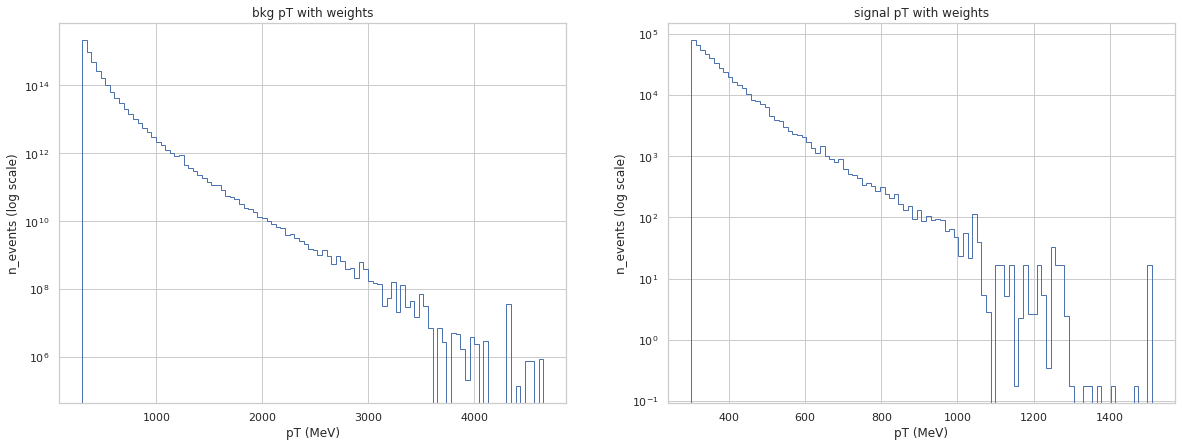

In [103]:
bkg_p4 = combine('ditau_obj_p4', bkg=True)
bkg_pt = np.sqrt(bkg_p4.fP.fX**2 + bkg_p4.fP.fY**2)

plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.hist(bkg_pt, bins=100, weights=bkg_weight, histtype='step')
plt.yscale('log')
plt.xlabel('pT (MeV)')
plt.ylabel('n_events (log scale)')
plt.title('bkg pT with weights')

signal_p4 = combine('ditau_obj_p4', signal=True)
signal_pt = np.sqrt(signal_p4.fP.fX**2 + signal_p4.fP.fY**2)

plt.subplot(122)
plt.hist(signal_pt, bins=100, weights=signal_weight, histtype='step')
plt.yscale('log')
plt.xlabel('pT (MeV)')
plt.ylabel('n_events (log scale)')
plt.title('signal pT with weights')
plt.show()

## All variable plot (density = True)

In [109]:
plot_var = \
['ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
 'ditau_obj_R_jet',
 'ditau_obj_R_subjet',
 'ditau_obj_Rr_core',
#  'ditau_obj_bdt_score',
 'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
#  'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
 'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
#  'ditau_obj_p4',
 'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
#  'ditau_obj_subleadsubjet_p4',
 'ditau_obj_tauJetVtxFraction']
#  'event_number',
#  'weight_mc']

Start Plot: ditau_obj_IsTruthHadronic
Start Plot: ditau_obj_IsTruthMatched
Start Plot: ditau_obj_R_jet
Start Plot: ditau_obj_R_subjet
Start Plot: ditau_obj_Rr_core
Start Plot: ditau_obj_charge
Start Plot: ditau_obj_leadsubjet_charge
Start Plot: ditau_obj_leadsubjet_n_core_tracks
Start Plot: ditau_obj_nSubjets
Start Plot: ditau_obj_n_iso_tracks
Start Plot: ditau_obj_n_tracks
Start Plot: ditau_obj_subjets_dR
Start Plot: ditau_obj_subleadsubjet_charge
Start Plot: ditau_obj_subleadsubjet_n_core_tracks
Start Plot: ditau_obj_tauJetVtxFraction


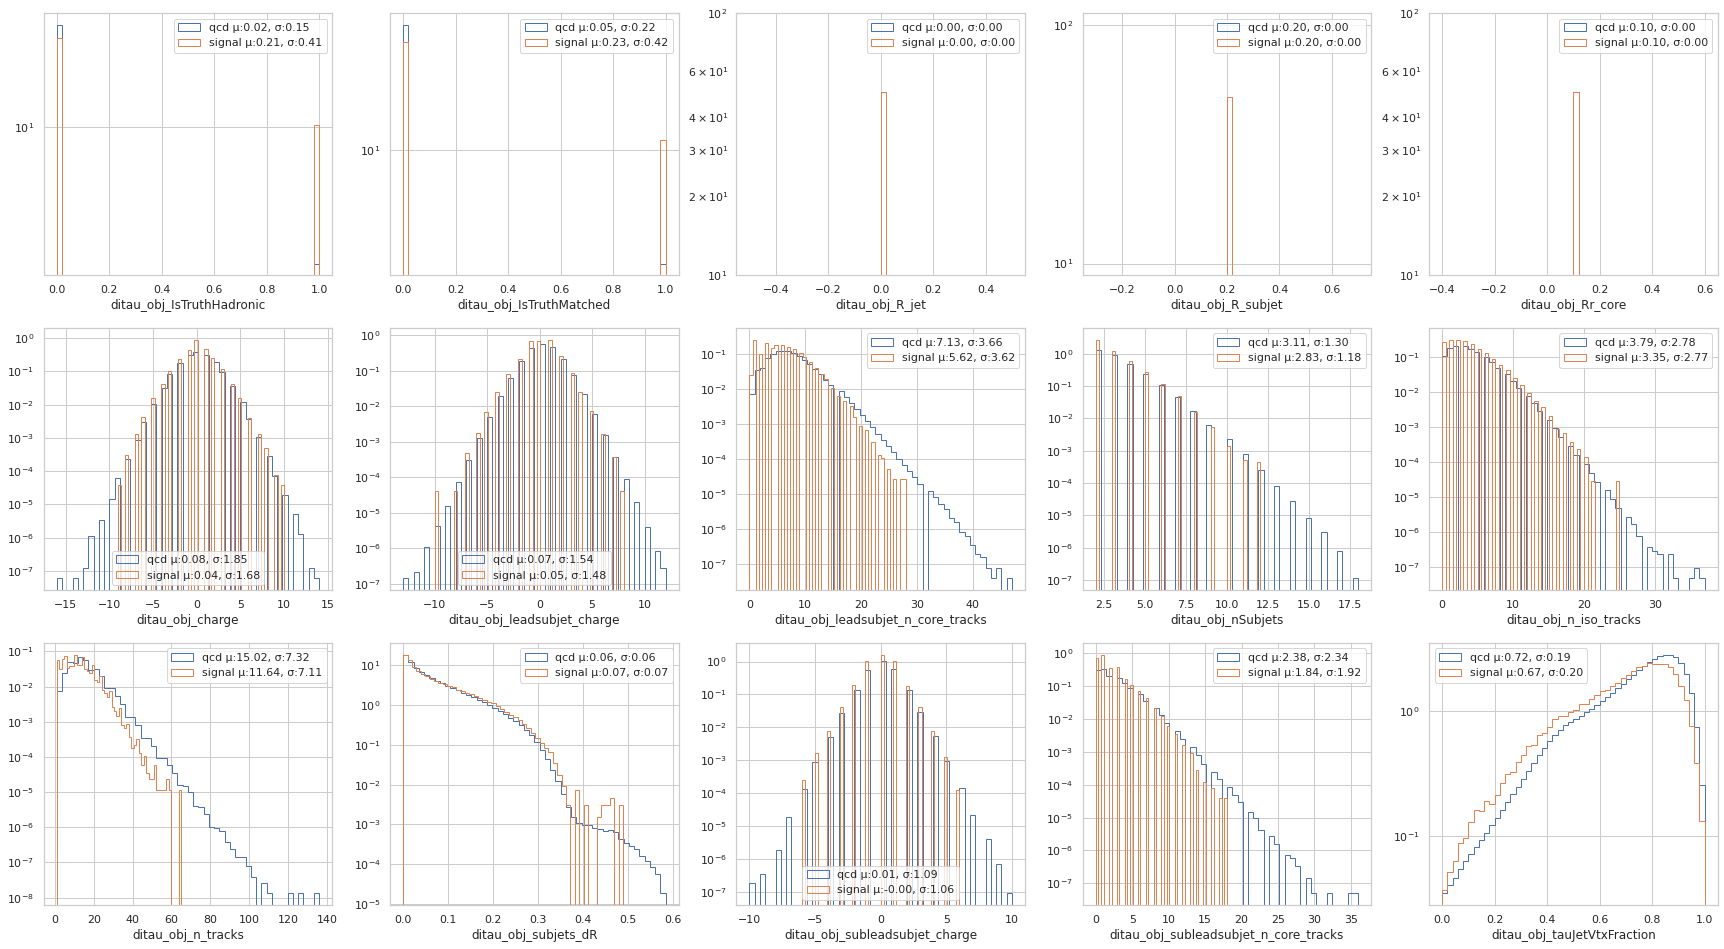

In [111]:
plt.figure(figsize=(30, 28))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num)
    bin = 50
    bkg_tmp = combine(variable, bkg=True)
    plt.hist(bkg_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_tmp):.2f}, σ:{np.std(bkg_tmp):.2f}')
    signal_tmp = combine(variable, signal=True)
    plt.hist(signal_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_tmp):.2f}, σ:{np.std(signal_tmp):.2f}')
    #plt.hist(bkg[variable], bins=bin, histtype='step', linewidth=1, label=f'qcd μ:{np.mean(bkg[variable]):.2f}, σ:{np.std(bkg[variable]):.2f}')
    #plt.hist(signal[variable], bins=bin, histtype='step', linewidth=1, label=f'signal μ:{np.mean(signal[variable]):.2f}, σ:{np.std(signal[variable]):.2f}')
    plt.xlabel(variable)
    #plt.ylabel("Number of Events (scaled)")
    #plt.title(xlabel)
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 1):
    hist(label, i)

### p4 plot

In [113]:
plot_p4 = \
['ditau_obj_leadsubjet_p4',
 'ditau_obj_p4',
 'ditau_obj_subleadsubjet_p4']

Start Plot: ditau_obj_leadsubjet_p4
Start Plot: ditau_obj_p4
Start Plot: ditau_obj_subleadsubjet_p4


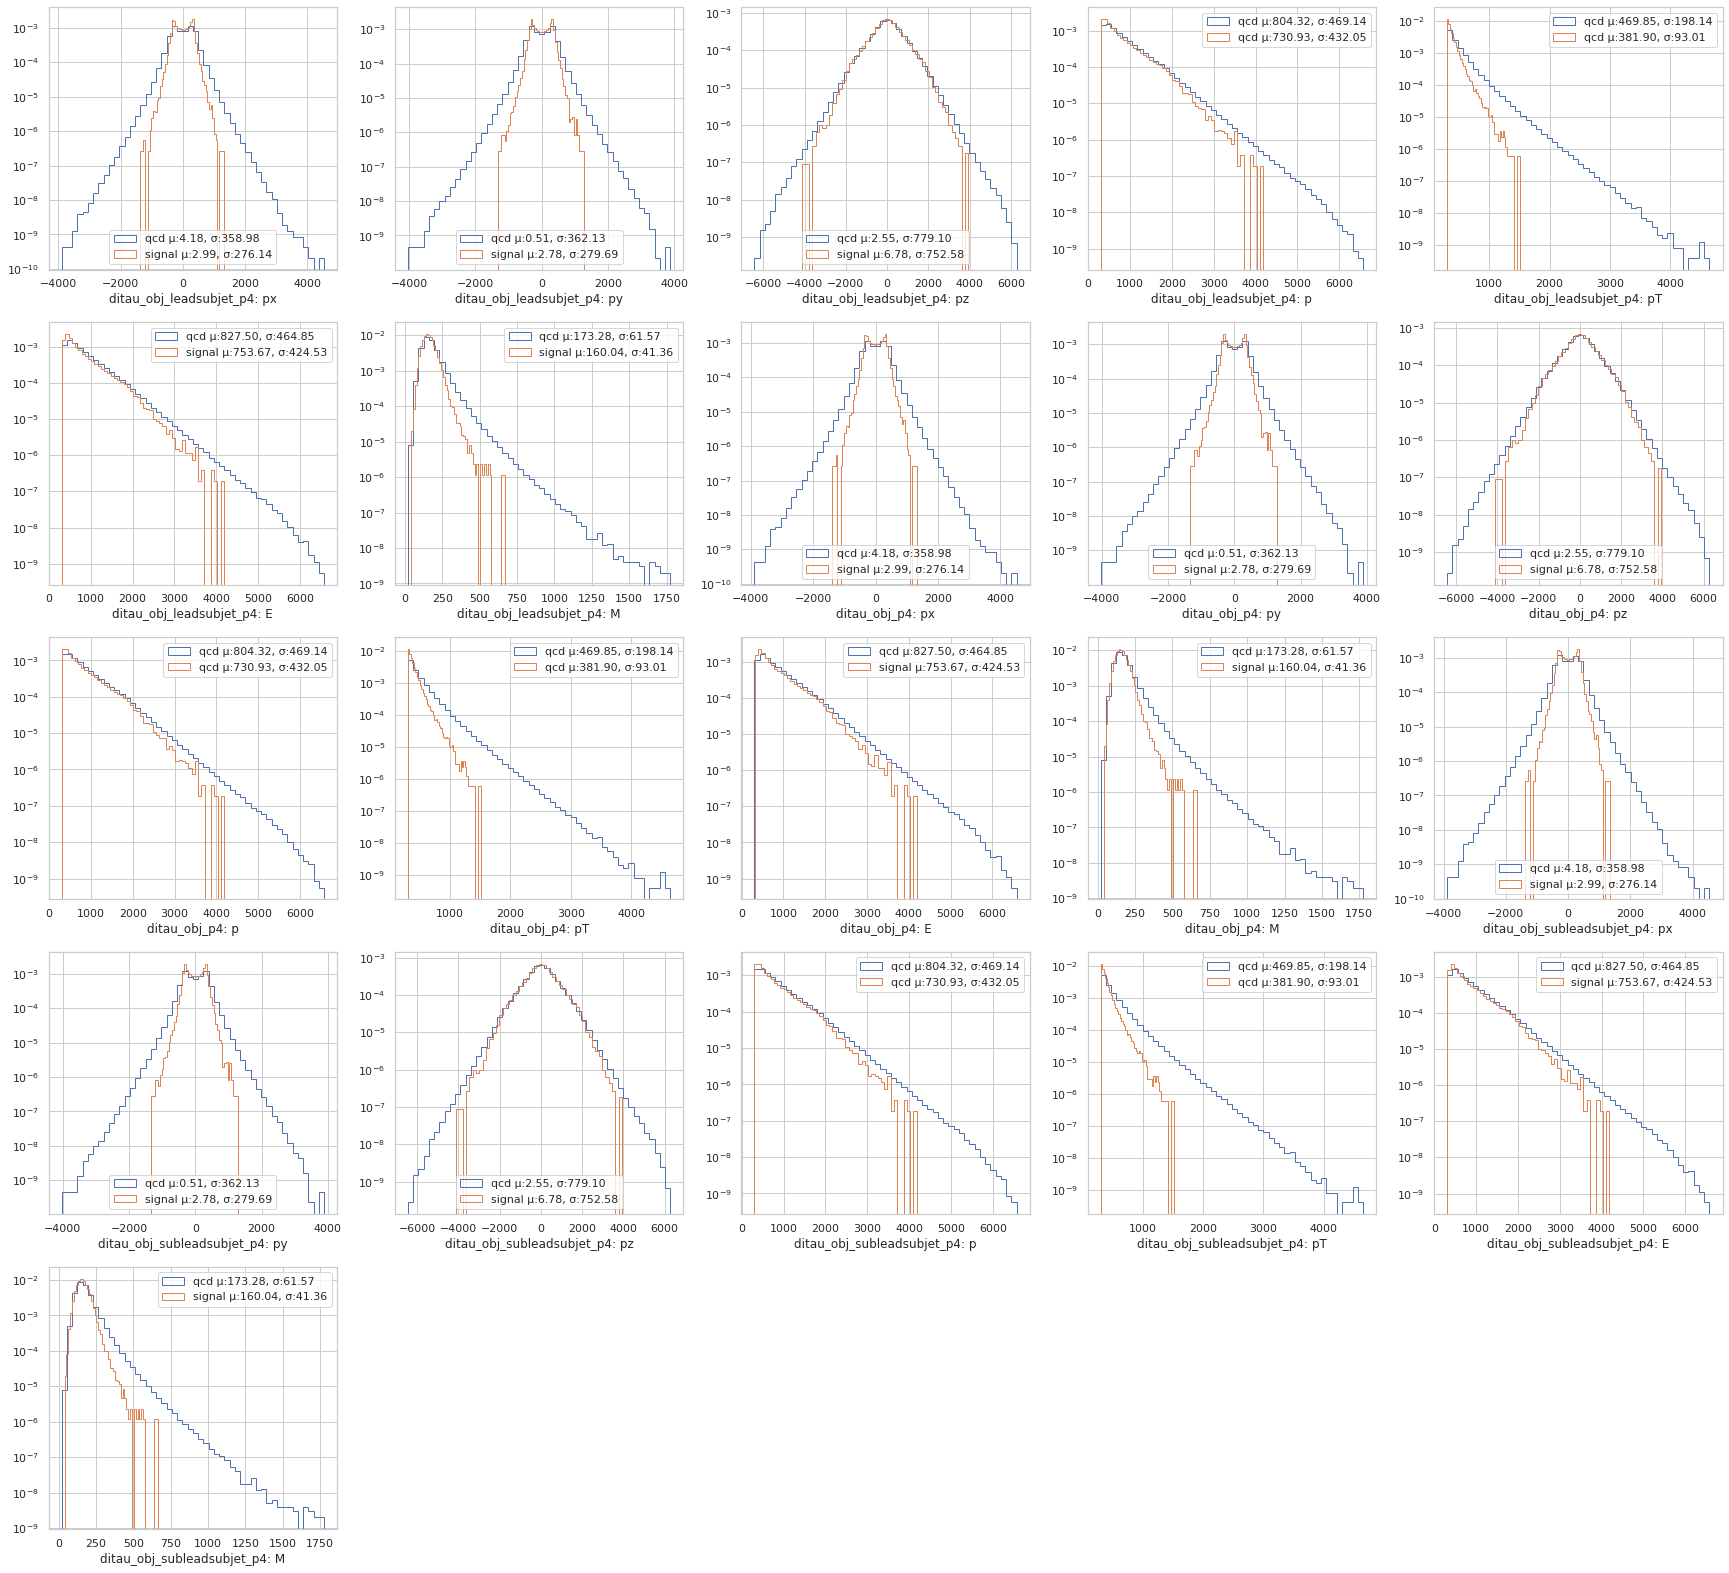

In [122]:
plt.figure(figsize=(30, 28))
bin = 50
def hist_p4(variable, plot_num, xlabel):
    print("Start Plot:", variable)
    bkg_tmp = combine(variable, bkg=True)
    bkg_pt = np.sqrt(bkg_p4.fP.fX**2 + bkg_p4.fP.fY**2)
    bkg_p = np.sqrt(bkg_p4.fP.fX**2 + bkg_p4.fP.fY**2 + bkg_p4.fP.fZ**2)
    bkg_m = np.sqrt(bkg_p4.fE**2 - bkg_p**2) #E**2 - (px**2 + py**2 + pz**2)
    signal_tmp = combine(variable, signal=True)
    signal_pt = np.sqrt(signal_p4.fP.fX**2 + signal_p4.fP.fY**2)
    signal_p = np.sqrt(signal_p4.fP.fX**2 + signal_p4.fP.fY**2 + signal_p4.fP.fZ**2)
    signal_m = np.sqrt(signal_p4.fE**2 - signal_p**2) #E**2 - (px**2 + py**2 + pz**2)

    plt.subplot(5, 5, plot_num+1)
    plt.hist(bkg_p4.fP.fX, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fX):.2f}, σ:{np.std(bkg_p4.fP.fX):.2f}')
    plt.hist(signal_p4.fP.fX, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fX):.2f}, σ:{np.std(signal_p4.fP.fX):.2f}')
    plt.xlabel(xlabel+': px')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+2)
    plt.hist(bkg_p4.fP.fY, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fY):.2f}, σ:{np.std(bkg_p4.fP.fY):.2f}')
    plt.hist(signal_p4.fP.fY, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fY):.2f}, σ:{np.std(signal_p4.fP.fY):.2f}')
    plt.xlabel(xlabel+': py')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+3)
    plt.hist(bkg_p4.fP.fZ, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fZ):.2f}, σ:{np.std(bkg_p4.fP.fZ):.2f}')
    plt.hist(signal_p4.fP.fZ, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fZ):.2f}, σ:{np.std(signal_p4.fP.fZ):.2f}')
    plt.xlabel(xlabel+': pz')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+4)
    plt.hist(bkg_p, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p):.2f}, σ:{np.std(bkg_p):.2f}')
    plt.hist(signal_p, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(signal_p):.2f}, σ:{np.std(signal_p):.2f}')
    plt.xlabel(xlabel+': p')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+5)
    plt.hist(bkg_pt, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_pt):.2f}, σ:{np.std(bkg_pt):.2f}')
    plt.hist(signal_pt, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(signal_pt):.2f}, σ:{np.std(signal_pt):.2f}')
    plt.xlabel(xlabel+': pT')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+6)
    plt.hist(bkg_p4.fE, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fE):.2f}, σ:{np.std(bkg_p4.fE):.2f}')
    plt.hist(signal_p4.fE, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fE):.2f}, σ:{np.std(signal_p4.fE):.2f}')
    plt.xlabel(xlabel+': E')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+7)
    plt.hist(bkg_m, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_m):.2f}, σ:{np.std(bkg_m):.2f}')
    plt.hist(signal_m, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_m):.2f}, σ:{np.std(signal_m):.2f}')
    plt.xlabel(xlabel+': M')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_p4, 0):
    hist_p4(label, i*7, label)

## Repeat all plots BUT w/out y log scale 

Start Plot: ditau_obj_IsTruthHadronic
Start Plot: ditau_obj_IsTruthMatched
Start Plot: ditau_obj_R_jet
Start Plot: ditau_obj_R_subjet
Start Plot: ditau_obj_Rr_core
Start Plot: ditau_obj_charge
Start Plot: ditau_obj_leadsubjet_charge
Start Plot: ditau_obj_leadsubjet_n_core_tracks
Start Plot: ditau_obj_nSubjets
Start Plot: ditau_obj_n_iso_tracks
Start Plot: ditau_obj_n_tracks
Start Plot: ditau_obj_subjets_dR
Start Plot: ditau_obj_subleadsubjet_charge
Start Plot: ditau_obj_subleadsubjet_n_core_tracks
Start Plot: ditau_obj_tauJetVtxFraction


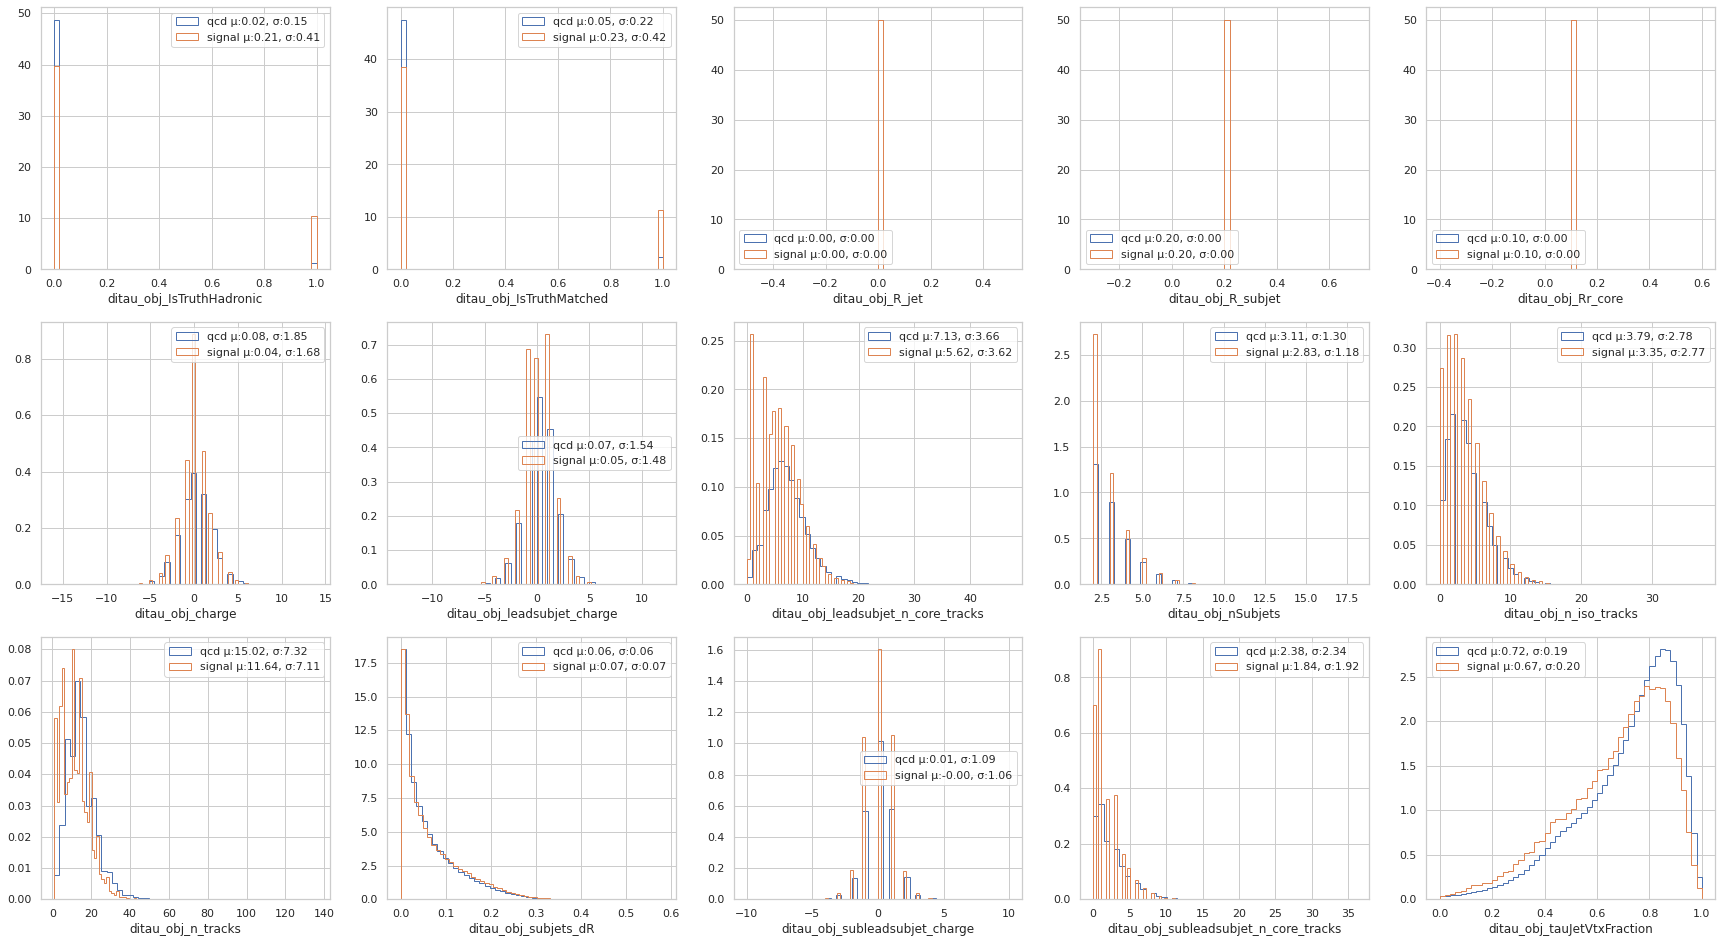

In [123]:
plot_var = \
['ditau_obj_IsTruthHadronic',
 'ditau_obj_IsTruthMatched',
 'ditau_obj_R_jet',
 'ditau_obj_R_subjet',
 'ditau_obj_Rr_core',
#  'ditau_obj_bdt_score',
 'ditau_obj_charge',
 'ditau_obj_leadsubjet_charge',
 'ditau_obj_leadsubjet_n_core_tracks',
#  'ditau_obj_leadsubjet_p4',
 'ditau_obj_nSubjets',
 'ditau_obj_n_iso_tracks',
 'ditau_obj_n_tracks',
#  'ditau_obj_p4',
 'ditau_obj_subjets_dR',
 'ditau_obj_subleadsubjet_charge',
 'ditau_obj_subleadsubjet_n_core_tracks',
#  'ditau_obj_subleadsubjet_p4',
 'ditau_obj_tauJetVtxFraction']
#  'event_number',
#  'weight_mc']

plt.figure(figsize=(30, 28))
def hist(variable, plot_num):
    print("Start Plot:", variable)
    plt.subplot(5, 5, plot_num)
    bin = 50
    bkg_tmp = combine(variable, bkg=True)
    plt.hist(bkg_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_tmp):.2f}, σ:{np.std(bkg_tmp):.2f}')
    signal_tmp = combine(variable, signal=True)
    plt.hist(signal_tmp, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_tmp):.2f}, σ:{np.std(signal_tmp):.2f}')
    plt.xlabel(variable)
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_var, 1):
    hist(label, i)

Start Plot: ditau_obj_leadsubjet_p4
Start Plot: ditau_obj_p4
Start Plot: ditau_obj_subleadsubjet_p4


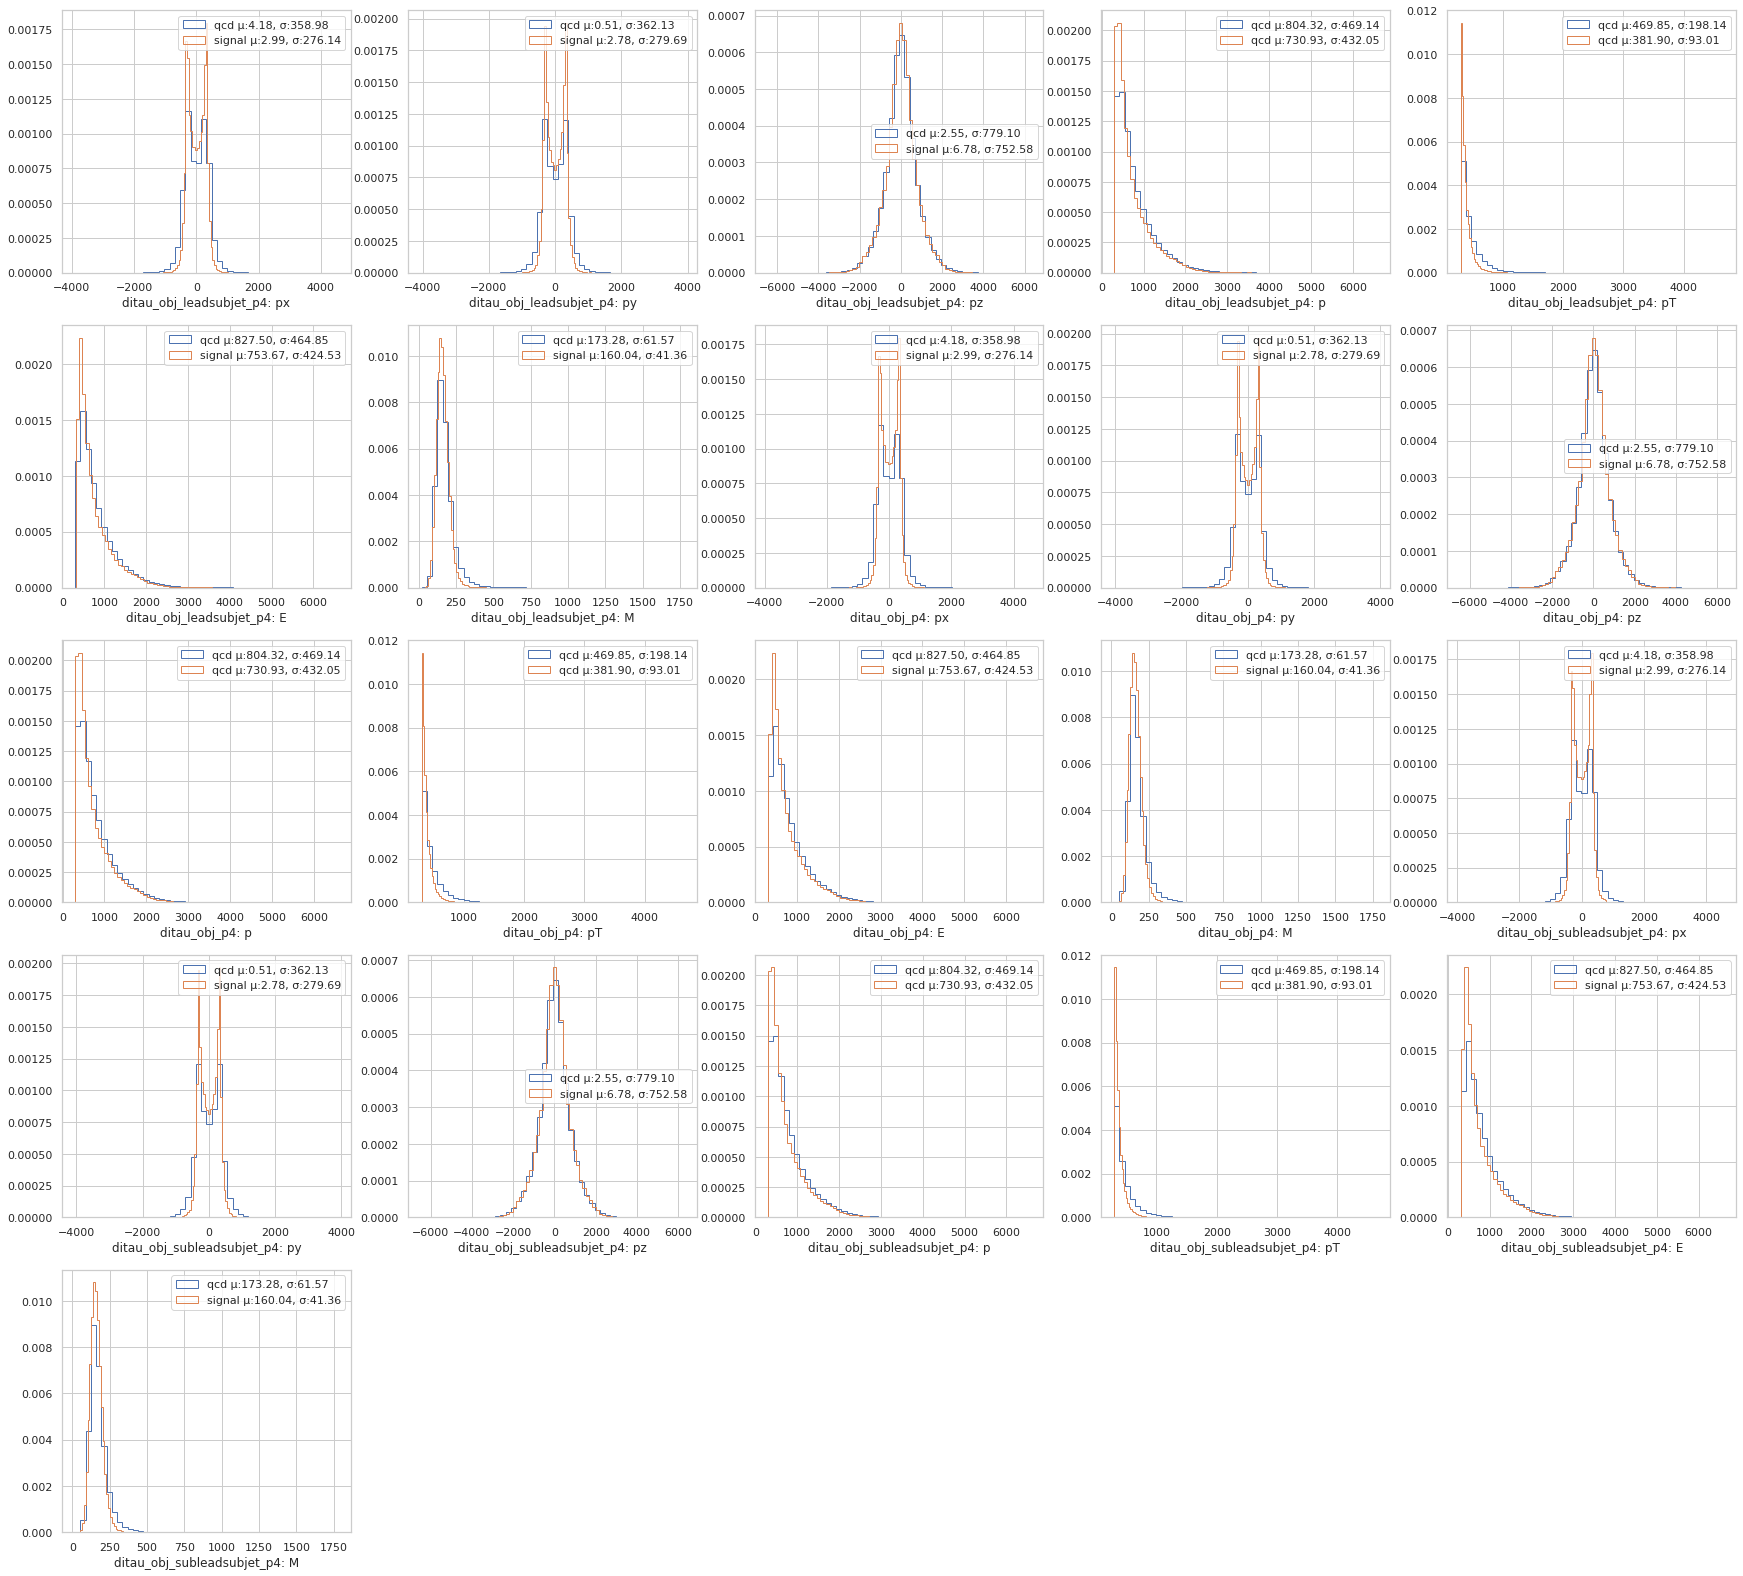

In [125]:
plot_p4 = \
['ditau_obj_leadsubjet_p4',
 'ditau_obj_p4',
 'ditau_obj_subleadsubjet_p4']

plt.figure(figsize=(30, 28))
bin = 50
def hist_p4(variable, plot_num, xlabel):
    print("Start Plot:", variable)
    bkg_tmp = combine(variable, bkg=True)
    bkg_pt = np.sqrt(bkg_p4.fP.fX**2 + bkg_p4.fP.fY**2)
    bkg_p = np.sqrt(bkg_p4.fP.fX**2 + bkg_p4.fP.fY**2 + bkg_p4.fP.fZ**2)
    bkg_m = np.sqrt(bkg_p4.fE**2 - bkg_p**2) #E**2 - (px**2 + py**2 + pz**2)
    signal_tmp = combine(variable, signal=True)
    signal_pt = np.sqrt(signal_p4.fP.fX**2 + signal_p4.fP.fY**2)
    signal_p = np.sqrt(signal_p4.fP.fX**2 + signal_p4.fP.fY**2 + signal_p4.fP.fZ**2)
    signal_m = np.sqrt(signal_p4.fE**2 - signal_p**2) #E**2 - (px**2 + py**2 + pz**2)

    plt.subplot(5, 5, plot_num+1)
    plt.hist(bkg_p4.fP.fX, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fX):.2f}, σ:{np.std(bkg_p4.fP.fX):.2f}')
    plt.hist(signal_p4.fP.fX, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fX):.2f}, σ:{np.std(signal_p4.fP.fX):.2f}')
    plt.xlabel(xlabel+': px')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+2)
    plt.hist(bkg_p4.fP.fY, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fY):.2f}, σ:{np.std(bkg_p4.fP.fY):.2f}')
    plt.hist(signal_p4.fP.fY, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fY):.2f}, σ:{np.std(signal_p4.fP.fY):.2f}')
    plt.xlabel(xlabel+': py')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+3)
    plt.hist(bkg_p4.fP.fZ, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fP.fZ):.2f}, σ:{np.std(bkg_p4.fP.fZ):.2f}')
    plt.hist(signal_p4.fP.fZ, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fP.fZ):.2f}, σ:{np.std(signal_p4.fP.fZ):.2f}')
    plt.xlabel(xlabel+': pz')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+4)
    plt.hist(bkg_p, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p):.2f}, σ:{np.std(bkg_p):.2f}')
    plt.hist(signal_p, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(signal_p):.2f}, σ:{np.std(signal_p):.2f}')
    plt.xlabel(xlabel+': p')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+5)
    plt.hist(bkg_pt, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_pt):.2f}, σ:{np.std(bkg_pt):.2f}')
    plt.hist(signal_pt, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(signal_pt):.2f}, σ:{np.std(signal_pt):.2f}')
    plt.xlabel(xlabel+': pT')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+6)
    plt.hist(bkg_p4.fE, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_p4.fE):.2f}, σ:{np.std(bkg_p4.fE):.2f}')
    plt.hist(signal_p4.fE, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_p4.fE):.2f}, σ:{np.std(signal_p4.fE):.2f}')
    plt.xlabel(xlabel+': E')
    plt.legend()
    plt.grid(True)

    plt.subplot(5, 5, plot_num+7)
    plt.hist(bkg_m, bins=bin, histtype='step', linewidth=1, density=True, label=f'qcd μ:{np.mean(bkg_m):.2f}, σ:{np.std(bkg_m):.2f}')
    plt.hist(signal_m, bins=bin, histtype='step', linewidth=1, density=True, label=f'signal μ:{np.mean(signal_m):.2f}, σ:{np.std(signal_m):.2f}')
    plt.xlabel(xlabel+': M')
    plt.legend()
    plt.grid(True)

for i, label in enumerate(plot_p4, 0):
    hist_p4(label, i*7, label)